In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
data=pd.read_excel("c:/users/daniel/documents/Edureka/Data_Train.xlsx")

In [4]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [5]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
data.loc[data["Route"].isnull()==True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
data=data.dropna()

In [9]:
data["Duration"].head(5)

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [10]:
data["duration_hour"]=data["Duration"].apply(lambda x: x.split("h")[0] if "h" in x else 0)

In [11]:
data["duration_min"]=data["Duration"].apply(lambda x: 0 if "m" not in x else x.split("m")[0] if "h" not in x else x.split(" ")[1].split("m")[0])

In [12]:
data["duration_hour"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', 0, '41', '40'], dtype=object)

In [13]:
data["Date_of_Journey"]=pd.to_datetime(data["Date_of_Journey"], format="%d/%m/%Y")

In [14]:
data["journey_day"]=data["Date_of_Journey"].dt.day

data["journey_month"]=data["Date_of_Journey"].dt.month

In [15]:
data["journey_weekday"]=data["Date_of_Journey"].dt.day_name()

In [16]:
data["journey_weekday_"]=data["Date_of_Journey"].dt.weekday

In [17]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,duration_hour,duration_min,journey_day,journey_month,journey_weekday,journey_weekday_
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2,50,24,3,Sunday,6
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7,25,1,5,Wednesday,2
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,19,0,9,6,Sunday,6


In [18]:
data["dep_hour"]=pd.to_datetime(data["Dep_Time"]).dt.hour
data["dep_min"]=pd.to_datetime(data["Dep_Time"]).dt.minute

data["arrival_hour"]=pd.to_datetime(data["Arrival_Time"]).dt.hour
data["arrival_min"]=pd.to_datetime(data["Arrival_Time"]).dt.minute

In [19]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,duration_hour,duration_min,journey_day,journey_month,journey_weekday,journey_weekday_,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2,50,24,3,Sunday,6,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7,25,1,5,Wednesday,2,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,19,0,9,6,Sunday,6,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,25,12,5,Sunday,6,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4,45,1,3,Friday,4,16,50,21,35


In [20]:
data.nunique()

Airline               12
Date_of_Journey       40
Source                 5
Destination            6
Route                128
Dep_Time             222
Arrival_Time        1343
Duration             368
Total_Stops            5
Additional_Info       10
Price               1870
duration_hour         44
duration_min          12
journey_day           10
journey_month          4
journey_weekday        7
journey_weekday_       7
dep_hour              24
dep_min               12
arrival_hour          24
arrival_min           12
dtype: int64

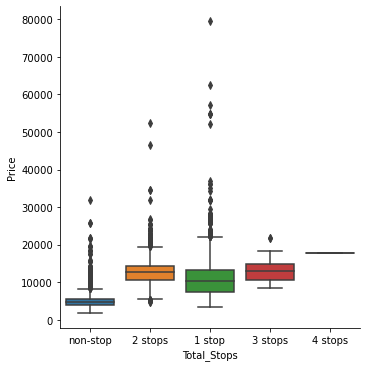

In [21]:
sb.catplot(x=data["Total_Stops"], y=data["Price"], data=data.sort_values("Price",ascending=False), kind="box")

plt.show()

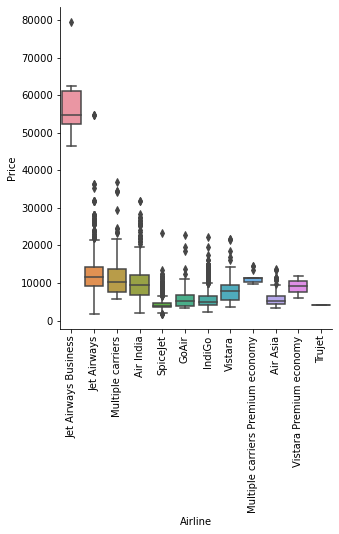

In [22]:
sb.catplot(x="Airline", y="Price", data=data.sort_values("Price",ascending=False), kind="box")

plt.xticks(rotation="vertical")

plt.show()

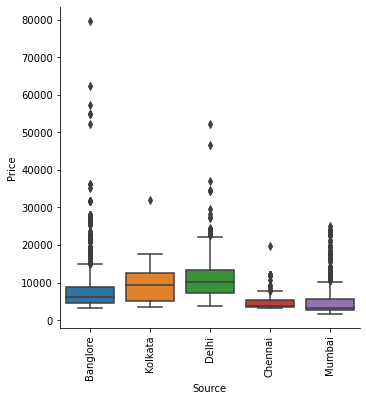

In [23]:
sb.catplot(x="Source", y="Price", data=data, kind="box")

plt.xticks(rotation="vertical")
plt.show()

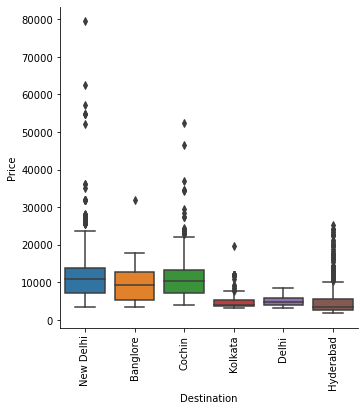

In [24]:
sb.catplot(x="Destination", y="Price", data=data, kind="box")

plt.xticks(rotation="vertical")
plt.show()

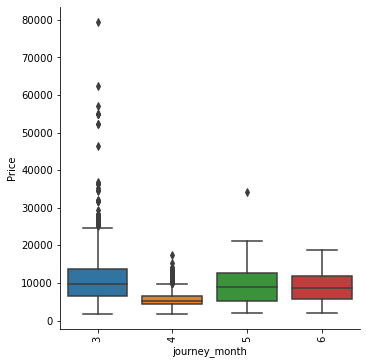

In [25]:
sb.catplot(x="journey_month", y="Price", data=data.sort_values("Price",ascending=False), kind="box")

plt.xticks(rotation="vertical")
plt.show()

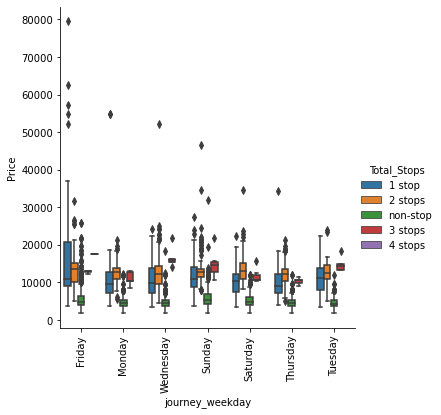

In [26]:
sb.catplot(x="journey_weekday", y="Price", data=data.sort_values("Price",ascending=False), hue="Total_Stops", kind="box")

plt.xticks(rotation="vertical")
plt.show()

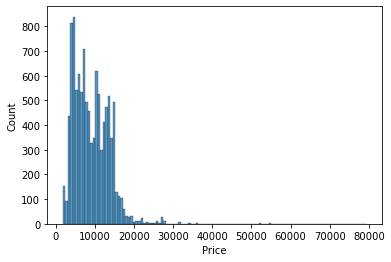

In [27]:
sb.histplot(data["Price"])

plt.show()

C:\Users\Daniel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


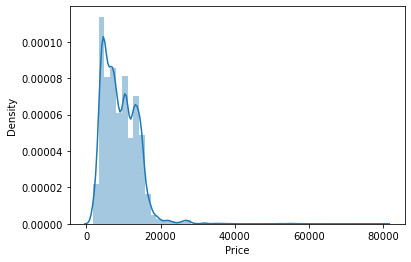

In [28]:
sb.distplot(data["Price"])

plt.show()

In [29]:
data1=data.copy()

#### Apply Norminal One Hot Encoding on the Airline, Source and Destination variables

##### They are not in any particular order

In [31]:
data=pd.get_dummies(data, columns=["Airline","Source","Destination"], drop_first=True)

In [32]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [33]:
data["Total_Stops"].replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}, inplace=True)

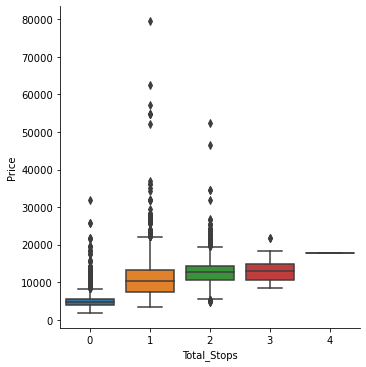

In [34]:
sb.catplot(x="Total_Stops", y="Price", data=data.sort_values("Price",ascending=False), kind="box")

plt.show()

In [35]:
data.columns

Index(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'duration_hour',
       'duration_min', 'journey_day', 'journey_month', 'journey_weekday',
       'journey_weekday_', 'dep_hour', 'dep_min', 'arrival_hour',
       'arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [36]:
data.head(3)

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,duration_hour,duration_min,journey_day,journey_month,journey_weekday,journey_weekday_,dep_hour,dep_min,arrival_hour,arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2019-03-24,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,2,50,24,3,Sunday,6,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2019-05-01,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,7,25,1,5,Wednesday,2,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2019-06-09,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,19,0,9,6,Sunday,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [37]:
data.drop(columns=['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration','Additional_Info','journey_weekday_','Airline_Trujet'], inplace=True)

In [38]:
data.head()

,Total_Stops,Price,duration_hour,duration_min,journey_day,journey_month,journey_weekday,dep_hour,dep_min,arrival_hour,arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,2,50,24,3,Sunday,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,7,25,1,5,Wednesday,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,19,0,9,6,Sunday,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,25,12,5,Sunday,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,4,45,1,3,Friday,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
data["journey_weekday"].unique()

array(['Sunday', 'Wednesday', 'Friday', 'Monday', 'Tuesday', 'Saturday',
       'Thursday'], dtype=object)

In [40]:
data["journey_weekday"].replace({'Sunday':1, 'Wednesday':4, 'Friday':6, 'Monday':2, 'Tuesday':3, 'Saturday':7,
       'Thursday':5}, inplace=True)

In [41]:
data.head()

,Total_Stops,Price,duration_hour,duration_min,journey_day,journey_month,journey_weekday,dep_hour,dep_min,arrival_hour,arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,2,50,24,3,1,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,7,25,1,5,4,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,19,0,9,6,1,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,25,12,5,1,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,4,45,1,3,6,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [42]:
data.dtypes

Total_Stops                                   int64
Price                                         int64
duration_hour                                object
duration_min                                 object
journey_day                                   int64
journey_month                                 int64
journey_weekday                               int64
dep_hour                                      int64
dep_min                                       int64
arrival_hour                                  int64
arrival_min                                   int64
Airline_Air India                             uint8
Airline_GoAir                                 uint8
Airline_IndiGo                                uint8
Airline_Jet Airways                           uint8
Airline_Jet Airways Business                  uint8
Airline_Multiple carriers                     uint8
Airline_Multiple carriers Premium economy     uint8
Airline_SpiceJet                              uint8
Airline_Vist

In [43]:
data["duration_hour"]=pd.to_numeric(data["duration_hour"])
data["duration_min"]=pd.to_numeric(data["duration_min"])

In [44]:
data.dtypes.head()

Total_Stops      int64
Price            int64
duration_hour    int64
duration_min     int64
journey_day      int64
dtype: object

In [45]:
data["Total_Stops"].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

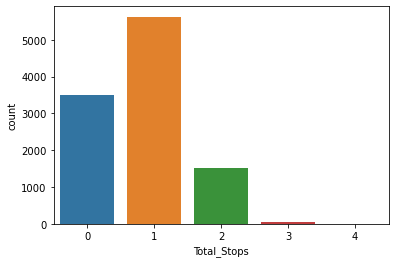

In [46]:
sb.countplot(x=data["Total_Stops"])

plt.show()

In [47]:
data.groupby("Total_Stops").median()["Price"]

Total_Stops
0     4667
1    10262
2    12760
3    12954
4    17686
Name: Price, dtype: int64

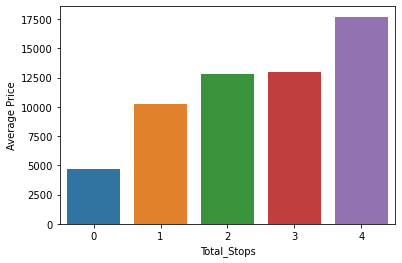

In [48]:
sb.barplot(x=data.groupby("Total_Stops").median()["Price"].index, y=data.groupby("Total_Stops").median()["Price"])

plt.xticks(data.groupby("Total_Stops").median()["Price"].index)
plt.ylabel("Average Price")
plt.show()

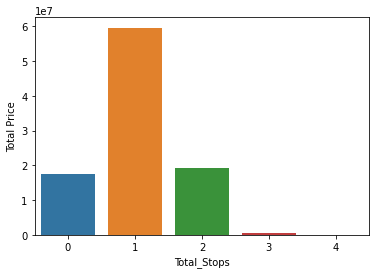

In [49]:
sb.barplot(x=data.groupby("Total_Stops").sum()["Price"].index, y=data.groupby("Total_Stops").sum()["Price"])

plt.xticks(data.groupby("Total_Stops").sum()["Price"].index)
plt.ylabel("Total Price")
plt.show()

In [50]:
data["journey_month"].value_counts()

5    3465
6    3414
3    2724
4    1079
Name: journey_month, dtype: int64

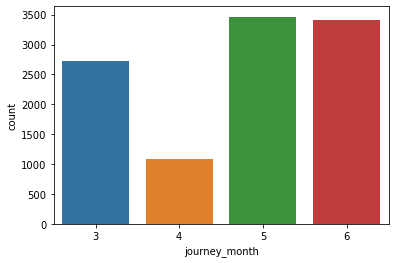

In [51]:
sb.countplot(x=data["journey_month"])

plt.show()

In [52]:
data.groupby("journey_month").median()["Price"]

journey_month
3    9650.5
4    5073.0
5    8891.0
6    8610.0
Name: Price, dtype: float64

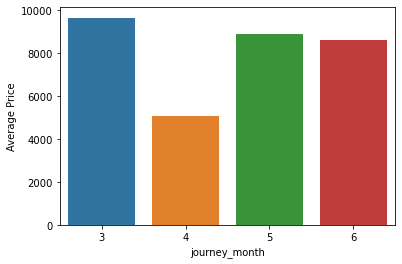

In [53]:
sb.barplot(x=data.groupby("journey_month").median()["Price"].index, y=data.groupby("journey_month").median()["Price"])

#plt.xticks(data.groupby("journey_month").median()["Price"].index)
plt.ylabel("Average Price")
plt.show()

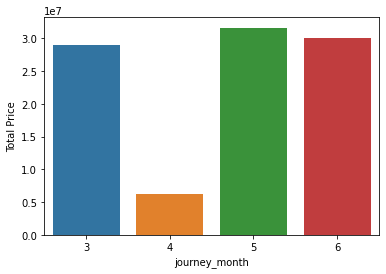

In [54]:
sb.barplot(x=data.groupby("journey_month").sum()["Price"].index, y=data.groupby("journey_month").sum()["Price"])

#plt.xticks(data.groupby("journey_month").median()["Price"].index)
plt.ylabel("Total Price")
plt.show()

In [55]:
data["journey_weekday"].value_counts()

4    2079
2    1849
5    1832
7    1670
1    1474
6     909
3     869
Name: journey_weekday, dtype: int64

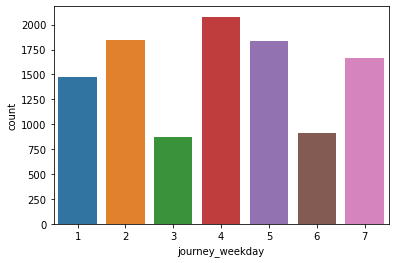

In [56]:
sb.countplot(x=data["journey_weekday"])

plt.show()

In [57]:
data.groupby("journey_weekday").median()["Price"]

journey_weekday
1    9454
2    7740
3    8586
4    8529
5    8367
6    7229
7    8372
Name: Price, dtype: int64

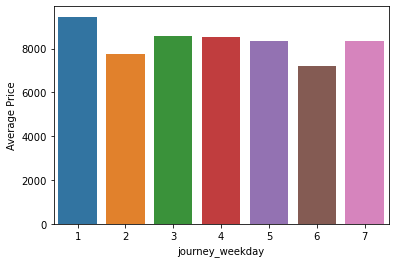

In [58]:
sb.barplot(x=data.groupby("journey_weekday").median()["Price"].index, y=data.groupby("journey_weekday").median()["Price"])

#plt.xticks(data.groupby("journey_month").median()["Price"].index)
plt.ylabel("Average Price")
plt.show()

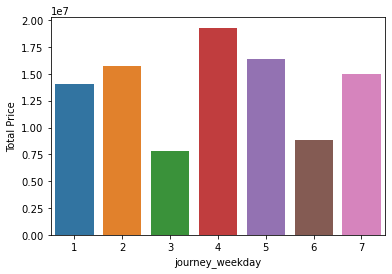

In [59]:
sb.barplot(x=data.groupby("journey_weekday").sum()["Price"].index, y=data.groupby("journey_weekday").sum()["Price"])

#plt.xticks(data.groupby("journey_month").median()["Price"].index)
plt.ylabel("Total Price")
plt.show()

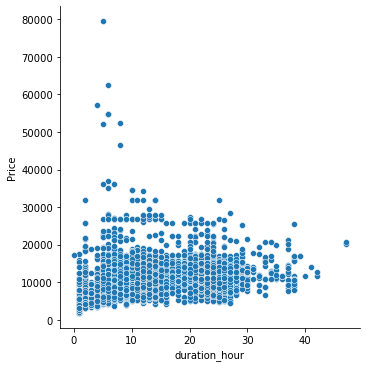

In [60]:
sb.relplot(x=data["duration_hour"], y=data["Price"])

plt.show()

In [61]:
#plt.figure(figsize=(20, 20))

#sb.heatmap(data.corr(), annot=True, cmap="RdYlGn")

#plt.show()

In [62]:
data.to_csv("flight_train.csv", index=False)

In [63]:
data1=pd.read_excel("c:/users/daniel/documents/Edureka/Test_set.xlsx")

data1=data1.dropna()

data1["duration_hour"]=data1["Duration"].apply(lambda x: x.split("h")[0] if "h" in x else 0)

data1["duration_min"]=data1["Duration"].apply(lambda x: 0 if "m" not in x else x.split("m")[0] if "h" not in x else x.split(" ")[1].split("m")[0])

data1["duration_hour"].unique()

data1["Date_of_Journey"]=pd.to_datetime(data1["Date_of_Journey"], format="%d/%m/%Y")

data1["journey_day"]=data1["Date_of_Journey"].dt.day

data1["journey_month"]=data1["Date_of_Journey"].dt.month

data1["journey_weekday"]=data1["Date_of_Journey"].dt.day_name()

data1["journey_weekday_"]=data1["Date_of_Journey"].dt.weekday

data1["dep_hour"]=pd.to_datetime(data1["Dep_Time"]).dt.hour
data1["dep_min"]=pd.to_datetime(data1["Dep_Time"]).dt.minute

data1["arrival_hour"]=pd.to_datetime(data1["Arrival_Time"]).dt.hour
data1["arrival_min"]=pd.to_datetime(data1["Arrival_Time"]).dt.minute


#### Apply Norminal One Hot Encoding on the Airline, Source and Destination variables

##### They are not in any particular order

data1=pd.get_dummies(data1, columns=["Airline","Source","Destination"], drop_first=True)

data1["Total_Stops"].unique()

data1["Total_Stops"].replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}, inplace=True)

data1.drop(columns=['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration','Additional_Info','journey_weekday_'], inplace=True)

data1.head()

data1["journey_weekday"].unique()

data1["journey_weekday"].replace({'Sunday':1, 'Wednesday':4, 'Friday':6, 'Monday':2, 'Tuesday':3, 'Saturday':7,
       'Thursday':5}, inplace=True)

data1["duration_hour"]=pd.to_numeric(data1["duration_hour"])
data1["duration_min"]=pd.to_numeric(data1["duration_min"])

In [64]:
data1.shape

(2671, 29)

In [65]:
data1.to_csv("flight_test.csv", index=False)

### Model Prediction

In [117]:
x1=pd.read_csv("flight_train.csv")

y1=pd.read_csv("flight_test.csv")

In [118]:
x=x1.drop(columns="Price")
y=x1["Price"]

xtest=y1

In [100]:
#from sklearn.model_selection import train_test_split

#trainx, testx, trainy, testy = train_test_split(x,y, test_size=0.25)

#### We want to check the Important Features

In [119]:
from sklearn.ensemble import ExtraTreesRegressor

features=ExtraTreesRegressor()
features.fit(x, y)

ExtraTreesRegressor()

In [120]:
features_analysis=features.feature_importances_

In [121]:
features_analysis

array([2.34628133e-01, 1.19925625e-01, 1.78534930e-02, 1.14536558e-01,
       5.18661170e-02, 2.95800427e-02, 2.44782693e-02, 2.04754991e-02,
       2.88918260e-02, 1.93780858e-02, 9.86834111e-03, 2.08494369e-03,
       2.03266480e-02, 1.34000459e-01, 6.64265979e-02, 1.82481352e-02,
       8.92623922e-04, 3.33343084e-03, 5.09892610e-03, 8.71845114e-05,
       5.16130435e-04, 9.86099438e-03, 3.07712250e-03, 6.55982004e-03,
       1.19979936e-02, 1.45514146e-02, 6.23362429e-03, 4.55448558e-04,
       2.47665132e-02])

In [122]:
pd.Series(features_analysis, index=xtrain.columns)*100

Total_Stops                                  23.462813
duration_hour                                11.992562
duration_min                                  1.785349
journey_day                                  11.453656
journey_month                                 5.186612
journey_weekday                               2.958004
dep_hour                                      2.447827
dep_min                                       2.047550
arrival_hour                                  2.889183
arrival_min                                   1.937809
Airline_Air India                             0.986834
Airline_GoAir                                 0.208494
Airline_IndiGo                                2.032665
Airline_Jet Airways                          13.400046
Airline_Jet Airways Business                  6.642660
Airline_Multiple carriers                     1.824814
Airline_Multiple carriers Premium economy     0.089262
Airline_SpiceJet                              0.333343
Airline_Vi

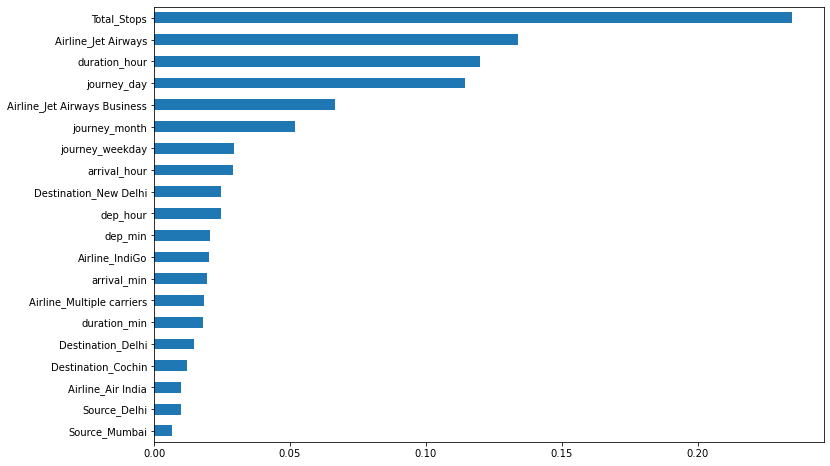

In [123]:
plt.figure(figsize=(12,8))

pd.Series(features_analysis, index=xtrain.columns).nlargest(20).sort_values(ascending=True).plot(kind="barh")

plt.show()

In [124]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)

(10682, 29)
(10682,)
(2671, 29)


In [76]:
print(xtrain.columns)
#print(ytrain.columns)

print(xtest.columns)

Index(['Total_Stops', 'duration_hour', 'duration_min', 'journey_day',
       'journey_month', 'journey_weekday', 'dep_hour', 'dep_min',
       'arrival_hour', 'arrival_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')
Index(['Total_Stops', 'duration_hour', 'duration_min', 'journey_day',
       'journey_month', 'journey_weekday', 'dep_hour', 'dep_min',
       'arrival_hour', 'arrival_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Mu

#### Now Let us run the model on the Data

In [125]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(x,y)

RandomForestRegressor()

In [126]:
y_out=model.predict(xtest)

In [129]:
model.score(xtest,y_out)

1.0

In [86]:
from sklearn import metrics